In [1]:
from TTT import *

Version:  0.2.41
Version:  0.0.49
TTT Version: 0.0.3


In [10]:
from tqdm.notebook import tqdm

In [6]:
Q1_agent=Agent(Q_move)
Q1_agent.post=Q_after
Q1_agent.Q=Table()  # makes an empty table
Q1_agent.learning=True

Q1_agent.α=0.3  # learning rate
Q1_agent.ϵ=0.1  # how often to take a random move
Q1_agent.γ=0.9  # memory constant -- how quickly does the table update back in time (earlier in the game)

In [43]:
Q2_agent=Agent(Q_move)
Q2_agent.post=Q_after
Q2_agent.Q=Table()  # makes an empty table
Q2_agent.learning=True

Q2_agent.α=0.3  # learning rate
Q2_agent.ϵ=0.1  # how often to take a random move
Q2_agent.γ=0.9  # memory constant -- how quickly does the table update back in time (earlier in the game)

In [59]:
Q1_agent.Q=Table()  # makes an empty table
Q2_agent.Q=Table()  # makes an empty table   

In [60]:
SaveTable(Q1_agent.Q,"Q1_table_TTT.json")
SaveTable(Q2_agent.Q,"Q2_table_TTT.json") 

In [61]:
percentage_player1_wins=[]
percentage_player2_wins=[]
percentage_ties=[]
total_number_of_games=[]
current_game_number=0

In [62]:
Q1_agent.Q=LoadTable("Q1_table_TTT.json")
Q2_agent.Q=LoadTable("Q2_table_TTT.json")

N_train=100
N_test=100


for i in tqdm(range(1500)):
    
    Q1_agent.learning=Q2_agent.learning=True
    g=Game(number_of_games=N_train)  
    g.display=False
    g.run(Q1_agent,Q2_agent)

    current_game_number+=N_train
    
    Q1_agent.learning=Q2_agent.learning=False
    g=Game(number_of_games=N_test)
    g.display=False
    results=g.run(Q1_agent,random_agent)
    
    percentage_player1_wins.append(results.count(1))
    percentage_player2_wins.append(results.count(2))
    percentage_ties.append(results.count(0)) 
    total_number_of_games.append(current_game_number)
    
SaveTable(Q1_agent.Q,"Q1_table_TTT.json")
SaveTable(Q2_agent.Q,"Q2_table_TTT.json")    
    

  0%|          | 0/1500 [00:00<?, ?it/s]

In [63]:
%matplotlib inline
from matplotlib.pylab import figure,plot,legend,xlabel,ylabel,imshow,cm,axis
import matplotlib.pylab as plt

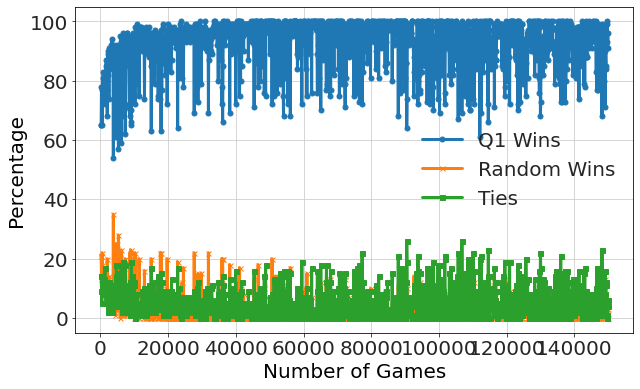

In [64]:
figure(figsize=(10,6))
plot(total_number_of_games,percentage_player1_wins,'-o',label="Q1 Wins")
plot(total_number_of_games,percentage_player2_wins,'-x',label="Random Wins")
plot(total_number_of_games,percentage_ties,'-s',label="Ties")
xlabel('Number of Games')
ylabel('Percentage')
legend()

In [65]:
g=Game(number_of_games=1)
g.display=False
results=g.run(minimax_agent,minimax_agent)
results

[0]

In [66]:
g=Game(number_of_games=1)
g.display=False
results=g.run(Q1_agent,minimax_agent)
results

[0]

In [67]:
g=Game(number_of_games=1)
g.display=False
results=g.run(minimax_agent,Q2_agent)
results

[0]